In [ ]:
# homework 1 ex 2
# Загрузите временной ряд (например, данные о ценах на акции) и создайте модель регрессии, для прогнозирования будущих значений.
#
# Краткий план:
# Загружаем датасет
# Добавляем лаги
# Строим корреляцию параметров
# Обучаем LinearRegression
# Обучаем LinearRegression с валидационной выборкой
# Обучаем RandomForestRegressor
# Подбираем макропараметры для XGBRegressor
# Обучаем XGBRegressor
# Сравниваем ошибки

In [ ]:
# загружаем датасет

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pprint import pprint as pprint
import seaborn as sns

def print_separator(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

print("load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset)
print(dataset.head())
print(dataset.info())
print(dataset.describe())


load csv
                     dt    open   close    high     low                Date
0      2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1      2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2      2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3      2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4      2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
...                 ...     ...     ...     ...     ...                 ...
24409  2008.12.31 16:45  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00
24410  2008.12.31 17:00  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00
24411  2008.12.31 17:15  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00
24412  2008.12.31 17:30  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00
24413  2008.12.31 17:45  1.3957  1.3917  1.3957  1.3914 2008-12-31 17:45:00

[24414 rows x 6 columns]
                 dt    open   close    high     low  

<Axes: >

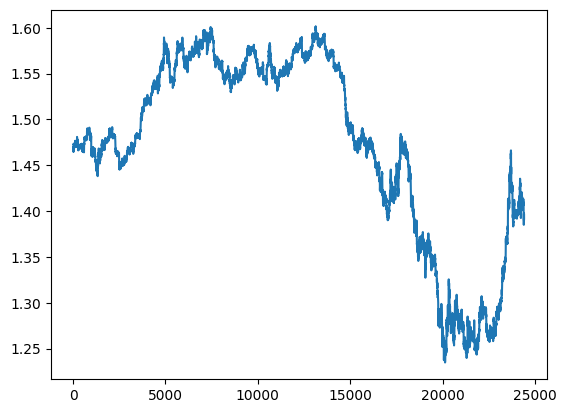

In [2]:
dataset.close.plot()

In [ ]:
# создаем датасет для обучения

In [16]:
from sklearn.model_selection import train_test_split

def create_lag_features(df, lag=5):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df

test_size = 0.2

dataset_lag = create_lag_features(dataset, lag=5)
dataset_lag.dropna(inplace=True)

X = dataset_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

results_err = []



In [ ]:
# смотрим корреляцию параметров первых 1000 значений ряда

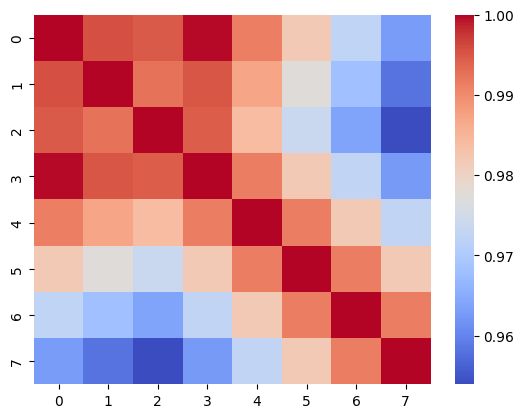

In [4]:
corr_matrix = np.corrcoef(X[:1000].T)
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
# функция для визуализации фактических и предсказанных значений

In [5]:
def show_forecast(y_t, y_p, pt):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_t, y=y_p, alpha=0.5)
    plt.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'r--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'{pt}. Фактические vs Предсказанные значения метода ') # + f'{name}'
    plt.show()
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_t[:10], y=y_p[:10], alpha=0.5)
    plt.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'r--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'{pt}. Фактические vs Предсказанные значения метода (первые 10)') # + f'{name}'
    plt.show()


In [ ]:
# обучаем LinearRegression


LinearRegression

train ...
Предсказание
Оценка модели
MSE: 2.7959690713236784e-07
MAE: 0.00036237859924479176
R^2 Score: 0.9999735043326399


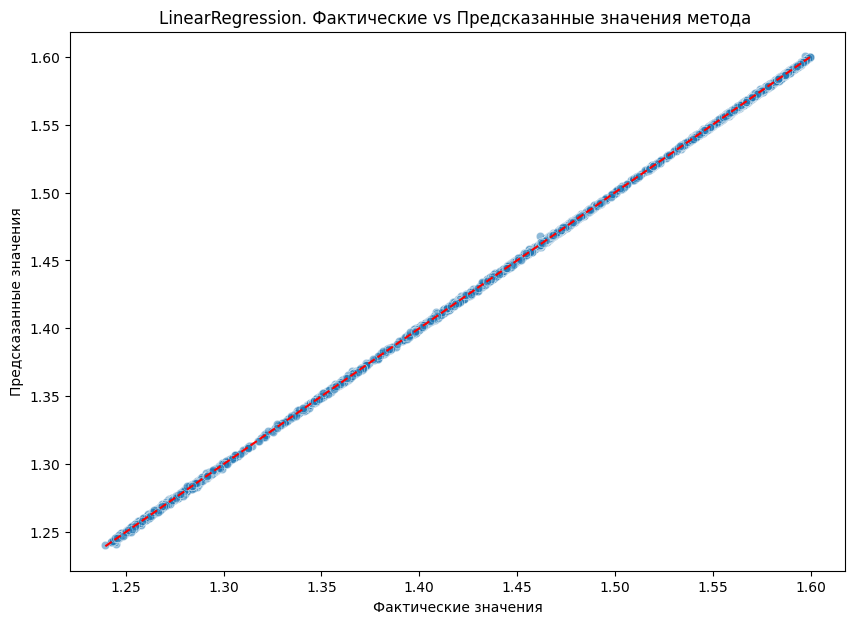

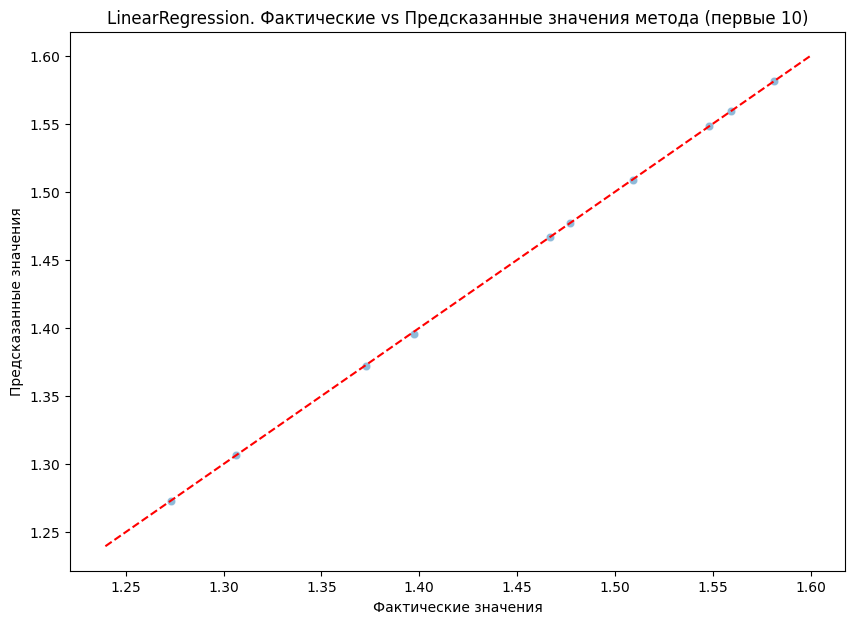

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


print_separator("LinearRegression")
model = LinearRegression()
print("train ...")
model.fit(X_train, y_train)
print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


show_forecast(y_test, y_pred, 'LinearRegression')

results_err.append({
    'model_name': "LinearRegression",
    'MSE': mse,
    'R2Score': r2
})


In [ ]:
# обучаем LinearRegression с валидационной выборкой


LinearRegression с валидационной выборкой

train ...
Предсказание val
Оценка модели val
MSE: 3.0621796095532554e-07
MAE: 0.0003673302240785567
R^2 Score: 0.9999712511034295

Предсказание test
Оценка модели test
MSE: 2.715166669352952e-07
MAE: 0.000361193569486196
R^2 Score: 0.9999738794358143


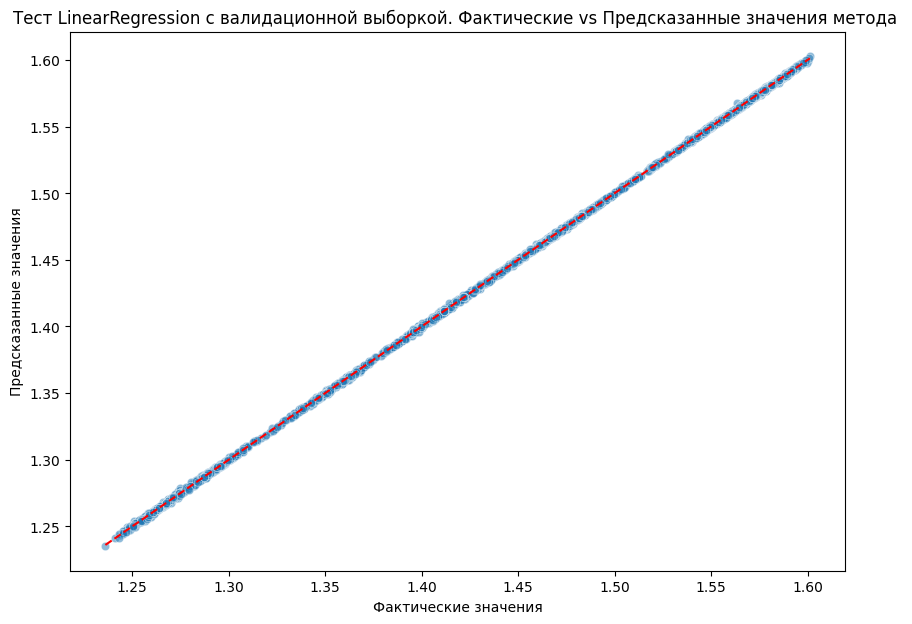

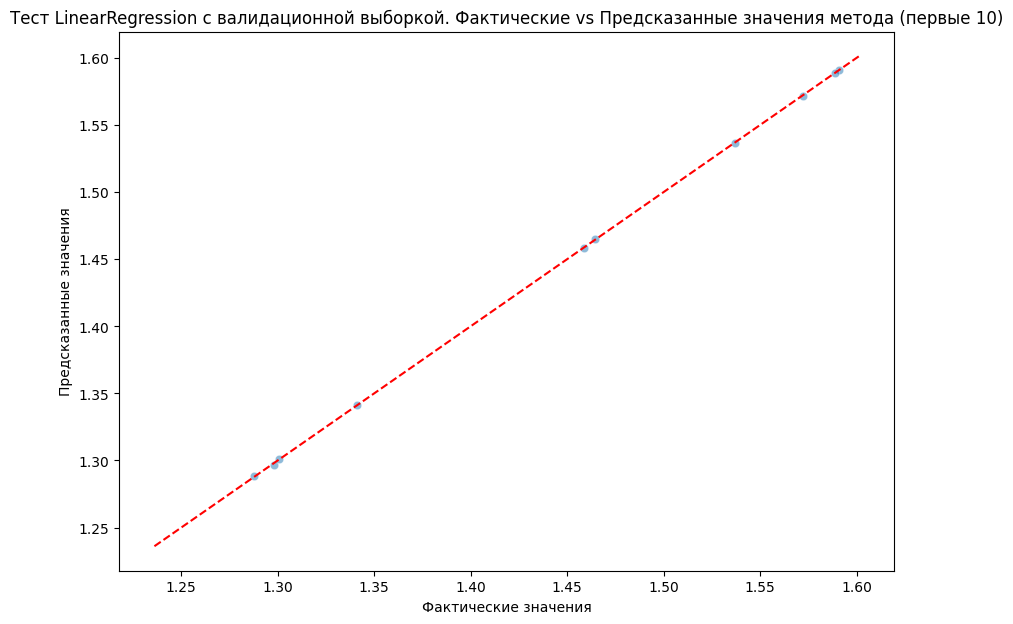

In [22]:
print_separator("LinearRegression с валидационной выборкой")
dataset_lag = create_lag_features(dataset, lag=5)
dataset_lag.dropna(inplace=True)

X = dataset_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
print("train ...")
model.fit(X_train, y_train)
print("Предсказание val")
y_pred_val = model.predict(X_val)

print("Оценка модели val")
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")
print()

print("Предсказание test")
y_pred = model.predict(X_test)

print("Оценка модели test")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


show_forecast(y_test, y_pred, 'Тест LinearRegression с валидационной выборкой')

results_err.append({
    'model_name': "LinearRegression VALID",
    'MSE': mse,
    'R2Score': r2
})

In [ ]:
# обучаем RandomForestRegressor


RandomForestRegressor

Предсказание
Оценка модели
MSE: 4.3428574087737527e-07
MAE: 0.0004368683886838709
R^2 Score: 0.999958220654748


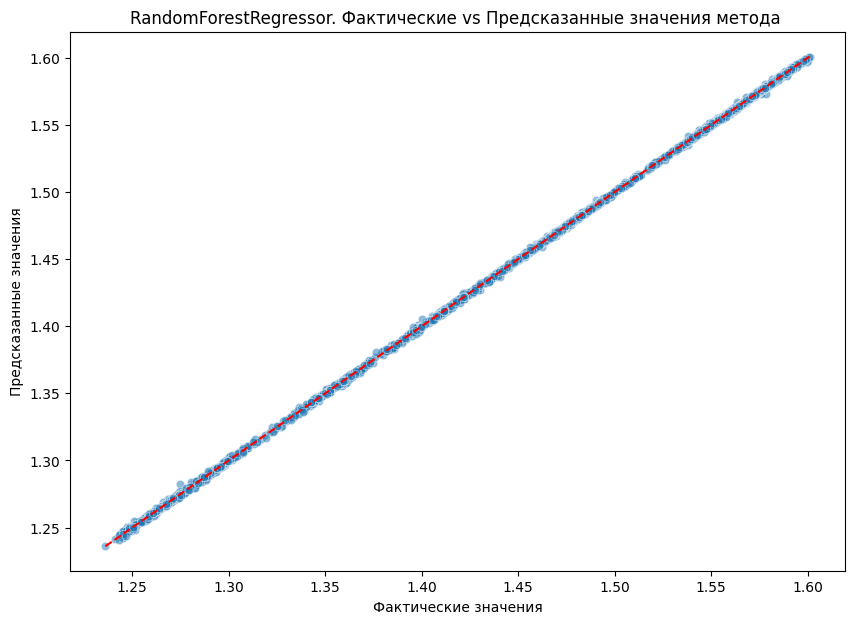

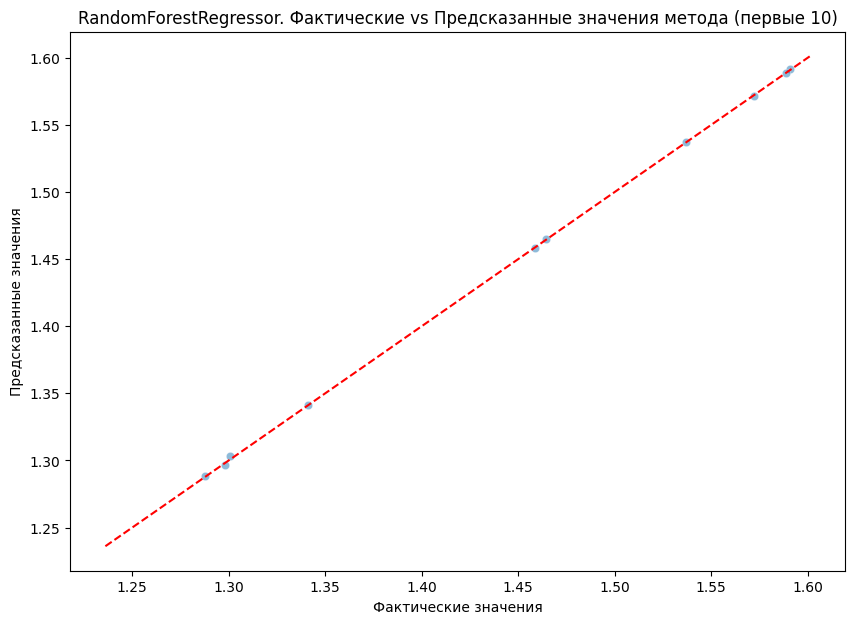

In [23]:
from sklearn.ensemble import RandomForestRegressor

print_separator("RandomForestRegressor")
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

show_forecast(y_test, y_pred, 'RandomForestRegressor')

results_err.append({
    'model_name': "RandomForestRegressor",
    'MSE': mse,
    'R2Score': r2
})

In [ ]:
# XGBRegressor

In [ ]:
# ищем гиперпараметры


XGBRegressor. Гиперпараметры



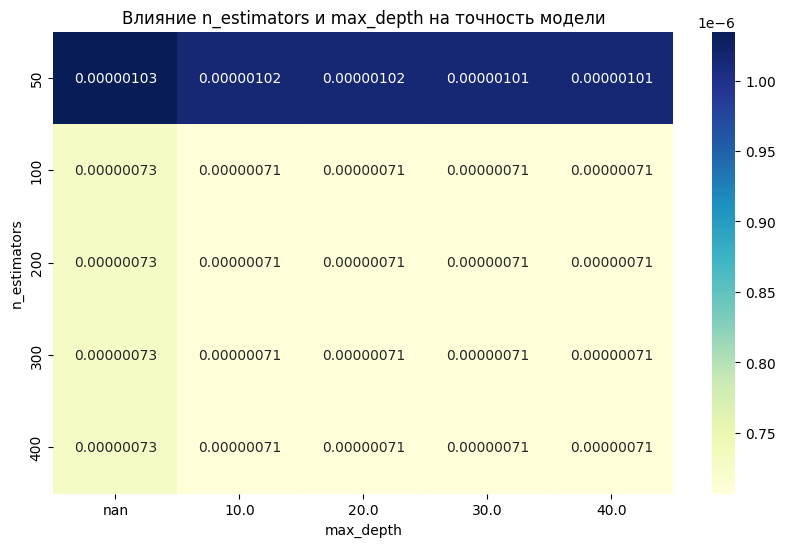

In [12]:
from xgboost import XGBRegressor

print_separator("XGBRegressor. Гиперпараметры")
n_estimators_range = [50, 100, 200, 300, 400]
max_depth_range = [None, 10, 20, 30, 40]

results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        clf = XGBRegressor(objective='reg:squarederror', n_estimators=n, learning_rate=0.1, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        results.append({
            'n_estimators': n,
            'max_depth': depth,
            'mse': mse
        })

results_df = pd.DataFrame(results)

pivot_table = results_df.pivot(index="n_estimators", columns="max_depth", values="mse")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".8f", cmap="YlGnBu")
plt.title("Влияние n_estimators и max_depth на точность модели")
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.show()



In [ ]:
# обучаем XGBRegressor


XGBRegressor

Предсказание
Оценка модели
MSE: 6.816779175639525e-07
MAE: 0.0005411966086509225
R^2 Score: 0.9999344209252392


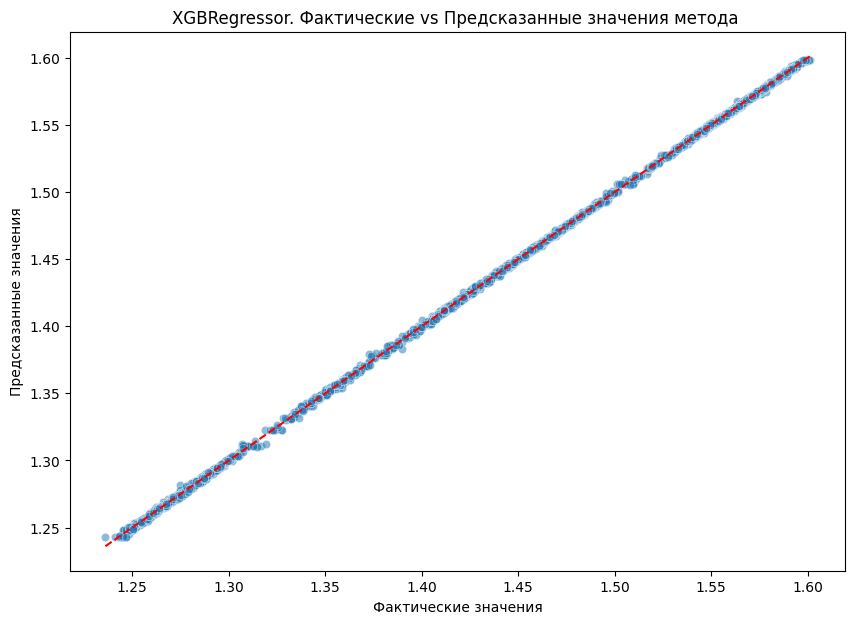

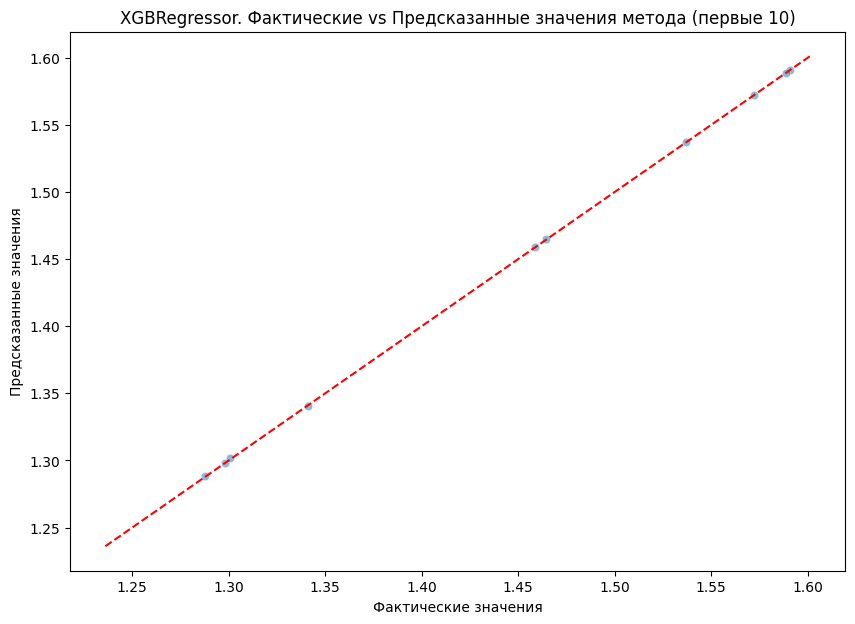

In [24]:
from xgboost import XGBRegressor

n_estimators=100
learning_rate=0.1
max_depth=10

print_separator("XGBRegressor")
model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


show_forecast(y_test, y_pred, 'XGBRegressor')

results_err.append({
    'model_name': "XGBRegressor",
    'MSE': mse,
    'R2Score': r2
})

In [ ]:
# выводим ошибки

In [48]:
from tabulate import tabulate

print(tabulate(results_err, tablefmt="pipe"))


|:-----------------------|------------:|---------:|
| LinearRegression       | 2.79597e-07 | 0.999974 |
| LinearRegression VALID | 2.71517e-07 | 0.999974 |
| RandomForestRegressor  | 4.34286e-07 | 0.999958 |
| XGBRegressor           | 6.81678e-07 | 0.999934 |
